In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

RandomState = 100000

##### ----> Read the file train.csv into Python 

In [2]:
titan = pd.read_csv('./Data/train.csv', sep=',')

In [3]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### DataFrame:

* NaN values: Age, Cabin
* Age check the distribution with a histogram and also the for male and female
* the passanger id and name is related directly to those who survived and not survived could possibly having data leakage
* google to check the method to fill in the NaN values of cabin if not then just **drop**
* fillin the NaN (this is feature engineering) values after splitting the train test dataframe
* drop the feature "Cabin" before splitting data 

##### -----> checking for NaN values in our DF

In [4]:
# it had more than 50% of missing values (613 NaN values)
# also name and keeping passenger id to identify who didnot not survive
titan.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [5]:
titan[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].isnull().sum()

Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [6]:
titan.dropna(axis=0, subset=['Embarked'], inplace=True)
titan.shape

(889, 9)

In [17]:
titan['Sex_use'] = titan['Sex']
titan.loc[titan['Sex_use'] == 'female', 'Sex_use']= 0
titan.loc[titan['Sex_use'] == 'male', 'Sex_use'] = 1
titan

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_use
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1
887,888,1,1,female,19.0,0,0,30.0000,S,0
888,889,0,3,female,NaN,1,2,23.4500,S,0
889,890,1,1,male,26.0,0,0,30.0000,C,1


##### -----> start splitting the dataframe into features and labels --> train and test

In [18]:
#features
X = titan[['PassengerId', 'Pclass', 'Sex', 'Sex_use', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
#label species
y = titan['Survived']

In [19]:
#check shape
X.shape, y.shape

((889, 9), (889,))

In [20]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)

In [21]:
#check shape again
X_train.shape, y_train.shape

((533, 9), (533,))

In [22]:
X_train.head()

,PassengerId,Pclass,Sex,Sex_use,Age,SibSp,Parch,Fare,Embarked
569,570,3,male,1,32.0,0,0,7.8542,S
786,787,3,female,0,18.0,0,0,7.4958,S
75,76,3,male,1,25.0,0,0,7.6500,S
114,115,3,female,0,17.0,0,0,14.4583,C
597,598,3,male,1,49.0,0,0,0.0000,S


In [23]:
X_train.reset_index(inplace=True)
X_train

,index,PassengerId,Pclass,Sex,Sex_use,Age,SibSp,Parch,Fare,Embarked
0,569,570,3,male,1,32.0,0,0,7.8542,S
1,786,787,3,female,0,18.0,0,0,7.4958,S
2,75,76,3,male,1,25.0,0,0,7.6500,S
3,114,115,3,female,0,17.0,0,0,14.4583,C
4,597,598,3,male,1,49.0,0,0,0.0000,S
...,...,...,...,...,...,...,...,...,...,...
528,107,108,3,male,1,NaN,0,0,7.7750,S
529,271,272,3,male,1,25.0,0,0,0.0000,S
530,862,863,1,female,0,48.0,0,0,25.9292,S
531,436,437,3,female,0,21.0,2,2,34.3750,S


In [24]:
X_train.drop(columns=['index'], inplace=True)
X_train

,PassengerId,Pclass,Sex,Sex_use,Age,SibSp,Parch,Fare,Embarked
0,570,3,male,1,32.0,0,0,7.8542,S
1,787,3,female,0,18.0,0,0,7.4958,S
2,76,3,male,1,25.0,0,0,7.6500,S
3,115,3,female,0,17.0,0,0,14.4583,C
4,598,3,male,1,49.0,0,0,0.0000,S
...,...,...,...,...,...,...,...,...,...
528,108,3,male,1,NaN,0,0,7.7750,S
529,272,3,male,1,25.0,0,0,0.0000,S
530,863,1,female,0,48.0,0,0,25.9292,S
531,437,3,female,0,21.0,2,2,34.3750,S


In [25]:
# feature engineering for categorical
categorical_features = ['Sex', "Embarked", "Pclass"]

# handle unknown means it will ignore nan's if it finds them
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [26]:
#get all indices = Females
#fem_ind = titan[titan['Sex'] == 'female']['PassengerId'].tolist()
#mal_ind = titan[titan['Sex'] == 'male']['PassengerId'].tolist()

In [27]:
# you can also create custom functions
# instead of a simple imputer for the age i will create a function to take the median by sex
def median_age(df):
    medi_ageF = df[df['Sex_use'] == 0]['Age'].median()
    medi_ageM = df[df['Sex_use'] == 1]['Age'].median()
    df.loc[df['Sex_use'] == 0, 'Age'] = df.loc[df['Sex_use'] == 0, 'Age'].fillna(medi_ageF)
    df.loc[df['Sex_use'] == 1, 'Age'] = df.loc[df['Sex_use'] == 1, 'Age'].fillna(medi_ageM)
    
    return df

In [28]:
# feature engineering for numericals
fare_feature = ["Fare"]

# create a sequential pipeline 
# output of one step will be input to the next 
fare_transformer = make_pipeline(
    KBinsDiscretizer(n_bins=4, encode='onehot-dense', strategy='quantile'))    

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ("categ", categorical_transformer, categorical_features),
        ("age", FunctionTransformer(median_age), ['Sex_use', 'Age']),
        ("fare", fare_transformer, fare_feature),
        ('Sex_use', 'drop', ['Sex_use']),
        
    ],
    remainder='passthrough')

In [30]:
X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_trans, X_test_trans

(array([[0.0, 1.0, 0.0, ..., 570, 0, 0],
        [1.0, 0.0, 0.0, ..., 787, 0, 0],
        [0.0, 1.0, 0.0, ..., 76, 0, 0],
        ...,
        [1.0, 0.0, 0.0, ..., 863, 0, 0],
        [1.0, 0.0, 0.0, ..., 437, 2, 2],
        [0.0, 1.0, 0.0, ..., 104, 0, 0]], dtype=object),
 array([[0.0, 1.0, 0.0, ..., 282, 0, 0],
        [1.0, 0.0, 0.0, ..., 436, 1, 2],
        [1.0, 0.0, 1.0, ..., 40, 1, 0],
        ...,
        [0.0, 1.0, 0.0, ..., 442, 0, 0],
        [0.0, 1.0, 0.0, ..., 165, 4, 1],
        [0.0, 1.0, 0.0, ..., 250, 1, 0]], dtype=object))

'PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'

In [31]:
m_log = LogisticRegression(max_iter=300)

In [32]:
#pipeline_log

In [33]:
m_log.fit(X_train_trans, y_train)

LogisticRegression(max_iter=300)

In [34]:
# calculate the accuracy score from training data
titanic1_train_accuracy = m_log.score(X_train_trans, y_train)
print('Train accuracy: ', titanic1_train_accuracy)
# calculate the accuracy score from test data
titanic1_test_accuracy = m_log.score(X_test_trans, y_test)
print('Test accuracy: ', titanic1_test_accuracy)

Train accuracy:  0.8048780487804879
Test accuracy:  0.797752808988764


In [38]:
# get predictions from the pipeline
pred = m_log.predict(X_test_trans)

In [39]:
#Precision vs Recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)

print("Precision: " +str(precision_score(y_test,pred))+ "   Recall: "+str(recall_score(y_test,pred)))

Precision: 0.75   Recall: 0.7394366197183099


In [41]:
# get prediction probabilities from the pipeline 
m_log.predict_proba(X_test_trans)

array([[0.92426812, 0.07573188],
       [0.06587368, 0.93412632],
       [0.22998398, 0.77001602],
       [0.75604151, 0.24395849],
       [0.04978454, 0.95021546],
       [0.91507131, 0.08492869],
       [0.7163502 , 0.2836498 ],
       [0.86870639, 0.13129361],
       [0.08345658, 0.91654342],
       [0.03469383, 0.96530617],
       [0.52881869, 0.47118131],
       [0.39161883, 0.60838117],
       [0.96900683, 0.03099317],
       [0.83428451, 0.16571549],
       [0.90506684, 0.09493316],
       [0.86892773, 0.13107227],
       [0.65654766, 0.34345234],
       [0.86112152, 0.13887848],
       [0.6461247 , 0.3538753 ],
       [0.90658059, 0.09341941],
       [0.77029931, 0.22970069],
       [0.06674049, 0.93325951],
       [0.95247266, 0.04752734],
       [0.34412358, 0.65587642],
       [0.90852493, 0.09147507],
       [0.4627066 , 0.5372934 ],
       [0.66976334, 0.33023666],
       [0.1300602 , 0.8699398 ],
       [0.50207177, 0.49792823],
       [0.71641901, 0.28358099],
       [0.

In [42]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,pred)
conf

array([[179,  35],
       [ 37, 105]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

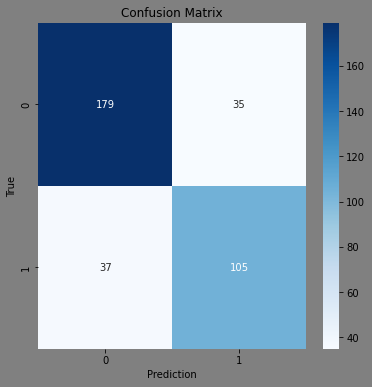

In [43]:
# visualize confusion matrix 
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax,fmt='g', cmap = 'Blues')
plt.gcf().set_facecolor('grey')
ax.set_xlabel('Prediction')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

In [44]:
# work on TEST.csv for Kaggle
test_tit = pd.read_csv('./Data/test.csv')


In [70]:
C_test_titF = test_tit.copy()
C_test_titF

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [65]:
C_test_titF.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

In [80]:
C_test_titF[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].isnull().sum(), C_test_titF.shape

(Sex          0
 Age         86
 SibSp        0
 Parch        0
 Fare         0
 Embarked     0
 dtype: int64,
 (418, 12))

In [79]:
C_test_titF['Fare'].fillna(C_test_titF['Fare'].mean(), inplace=True)

In [81]:
C_test_titF['Sex_use'] = C_test_titF['Sex']
C_test_titF.loc[C_test_titF['Sex_use'] == 'female', 'Sex_use']= 0
C_test_titF.loc[C_test_titF['Sex_use'] == 'male', 'Sex_use'] = 1
C_test_titF

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_use
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [82]:
# transform the TEST data set 
X_testFi_trans = preprocessor.transform(C_test_titF)

In [83]:
#prediction of final TEST dataset
pred_testF = m_log.predict(X_testFi_trans)

In [84]:
#prediction of final TEST dataset
m_log.predict_proba(X_testFi_trans)

array([[0.92233817, 0.07766183],
       [0.73359887, 0.26640113],
       [0.90274889, 0.09725111],
       [0.8947447 , 0.1052553 ],
       [0.4521394 , 0.5478606 ],
       [0.82883146, 0.17116854],
       [0.40520639, 0.59479361],
       [0.74620461, 0.25379539],
       [0.19894476, 0.80105524],
       [0.91844239, 0.08155761],
       [0.89464212, 0.10535788],
       [0.66322623, 0.33677377],
       [0.07339665, 0.92660335],
       [0.9294468 , 0.0705532 ],
       [0.18279098, 0.81720902],
       [0.07759984, 0.92240016],
       [0.74226279, 0.25773721],
       [0.80190282, 0.19809718],
       [0.48049341, 0.51950659],
       [0.44363906, 0.55636094],
       [0.69151242, 0.30848758],
       [0.84314006, 0.15685994],
       [0.05673351, 0.94326649],
       [0.26678431, 0.73321569],
       [0.13488452, 0.86511548],
       [0.96182948, 0.03817052],
       [0.02580783, 0.97419217],
       [0.81177341, 0.18822659],
       [0.61219584, 0.38780416],
       [0.87811267, 0.12188733],
       [0.

In [86]:
# exporting result
gender_submission1 = pd.DataFrame()
gender_submission1["PassengerId"]=C_test_titF["PassengerId"]
gender_submission1["Survived"]=pred_testF.reshape(-1,1)
gender_submission1.head(), gender_submission1.shape

(   PassengerId  Survived
 0          892         0
 1          893         0
 2          894         0
 3          895         0
 4          896         1,
 (418, 2))

In [87]:
gender_submission1.to_csv('Data/KaggleTest_LogisticRegression_sub1.csv',index=False)
